# <span style="color:navy;"> Lecture 8: Unsupervised Learning Methods </span>
Up until this lecture, we have studied mostly __supervised learning__ algorithms. That is, learners that require that the training data have specified __dependent variable__ for which data points that have been already been classified. This means that the supervised learner has an "answer key" to the training set. Unsupervised learning methods, however, are designed for datasets and objectives where no such answer key exists. Rather, they focus on potential __latent variables__, ones that are not necessarily apparent in the data, but can nevertheless be crucial in understanding the nature of the dataset and its behaviors.

## <span style="color:purple;"> Latent Variables </span>
When we say __latent variables__, we refer to variables that are not necessarily part of the data. For example, if we have a dataset with information on movie length, director, cast, and rated stars, we may not necessarily know the "genres" in the movie dataset. If our task was to identify the genres present in the data without using any other sources of information, we would have to somehow create groups and assign data points to each group. Our latent variable, then, is the __number of genre groups__, and their respective locations within the dataset.

Any sort of model assumed on a dataset, if it carries input parameters that does not exist within the data, can potentially be a unsupervised learning problem. In this lecture, we will explore a few of these problems. We will also take a closer look at three unsupervised learning methods: **Hierarchical Clustering**, **K-Means**, and **PCA**.

In [1]:
import pandas as pd
import numpy as np

sample_user_names = ["Arthur","Bob","Charlie","David"]
movie1_ratings = pd.Series([3,1,2,5],index=sample_user_names)
movie2_ratings = pd.Series([4,3,3,4],index=sample_user_names)
movie3_ratings = pd.Series([5,5,5,2],index=sample_user_names)
movie4_ratings = pd.Series([2,2,2,1],index=sample_user_names)
movie5_ratings = pd.Series([3,4,np.NaN,1],index=sample_user_names)

df = pd.DataFrame([movie1_ratings, movie2_ratings, movie3_ratings, movie4_ratings, movie5_ratings], columns=sample_user_names)
df.index = ['movie1_ratings', 'movie2_ratings', 'movie3_ratings', 'movie4_ratings', 'movie5_ratings']
print(df)


                Arthur  Bob  Charlie  David
movie1_ratings     3.0  1.0      2.0    5.0
movie2_ratings     4.0  3.0      3.0    4.0
movie3_ratings     5.0  5.0      5.0    2.0
movie4_ratings     2.0  2.0      2.0    1.0
movie5_ratings     3.0  4.0      NaN    1.0


Let us suppose that our objective here is to determine whether or not to recommend movie5 to Charlie. The NA here signifies that he has not yet watched the movie, and thus have not rated it. How could we go about this problem? 

__(Important side Note: notice how this problem is very much like a NA imputation problem, and has similar applications)__

### <span style="color:indigo;"> Collaborative Filtering </span>
Collaborative filtering uses other users' information to recommend the next content. So in this problem, we will first look for someone whose ratings are similar to Charlie - Bob, for example - to decide whether to recommend or not.

We see that Bob gave it a 4, and can use that information to predict that Charlie will think favorably of the movie as well, and recommend movie 5.

### <span style="color:indigo;"> Content Filtering </span>
Content filtering, on the other hand, does not use other users' information, but rather on past information on the certain user. For example, it examines whether movie5 is similar to any other movies that Charlie has seen. We can see that Charlie liked movie 3, and did not like movie 1 and 4. We can compare these movies to movie 5.

This requires another dataset on movies. This dataset could potentially carry information on cast, genre, director, year it was made, and etc.

## <span style="color:purple;"> Hierarchical Clustering </span>

![image](http://www.statisticshowto.com/wp-content/uploads/2016/11/clustergram.png)

**Hierarchical clustering** is exactly what it sounds like; it groups data in a multilevel set of clusters. Each circle in the image above represents a level in the hierarchy of clusters; the dendrogram to the right represents the same structure. In a bottom-up approach to hierarchical clustering, we start with each point as its own cluster and group clusters that are closer to each other into successively larger clusters until we reach a single cluster that contains all of the data points. 

### <span style="color:indigo;"> Proximity/ Similarity </span>

**Proximity**, or **similarity**, is how close a point is to other points within a bigger dataset. The most common measure used is **Euclidean Distance**, which is represented by the formula:

![image](http://mines.humanoriented.com/classes/2010/fall/csci568/portfolio_exports/sphilip/images/euclid_eqn.gif)

That is, the distance between two points is the square root of the sum of the squared differences in each dimension. The smaller this metric, the closer the points. There are a variety of ways to calculate this distance in Python; one is to use `linalg.norm` in numpy. For example:

In [2]:
import numpy as np

# create two points, a and b, in 4-dimensional space
a = np.array([1, -1, 1, -1])
b = np.array([3, 4, 5, 6])

# distance between a and b
dist = np.linalg.norm(a-b)
print(dist)

9.69535971483


The concept of proximity/similarity is central to the idea that similar things are close together and **cluster** together.

### <span style="color:indigo;"> Dendrograms </span>

![image](http://radio.feld.cvut.cz/matlab/toolbox/stats/dendro.gif)

**Dendrograms** are visualizations of hierarchical clustering. The length (or "height") of each line represents the distance between two clustering objects. Dendrograms are useful in estimating the number of clusters; any region where the lines have significant lengths (which indicates a substantial distance between clusters) can represent a valid number of clusters in the data. 

### <span style="color:indigo;"> Example 1: Zoo Animal Clustering </span>

We'll use hierarchical clustering on <a href="https://www.kaggle.com/uciml/zoo-animal-classification">this dataset</a>. When you look at the zoo.csv file, you'll notice that the animals in the dataset fall into 7 categories, numbered 1-7 under "class_type". To make this an unsupervised learning problem, we'll remove the "class_type" column and create clusters based on the other features. We'll also remove the "animal_name" column, since it's not immediately irrelevant for our purposes.

In [3]:
# import necessary packages
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

zoo_data = pd.read_csv('zoo.csv')

# drop columns from zoo_data
zoo_data = zoo_data.drop('animal_name', axis=1)
zoo_data = zoo_data.drop('class_type', axis=1)

# scale features using StandardScaler
zoo_data = StandardScaler().fit_transform(zoo_data)

Note that `AgglomerativeClustering()` allows you to specify the number of clusters to find (the default is 2). You can also specify the metric used (Euclidean, Ward, etc.). For more information, see the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html">documentation</a>. 

In [4]:
# form clusters
hclust = AgglomerativeClustering()
mod = hclust.fit(zoo_data)

Alternatively, we could use `scipy.cluster.hierarchy`. See <a href="https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html">documentation</a> for more information. We use `linkage()` in `scipy.cluster.hierarchy` to form the clusters and `dendrogram()` to plot the resulting dendrogram.

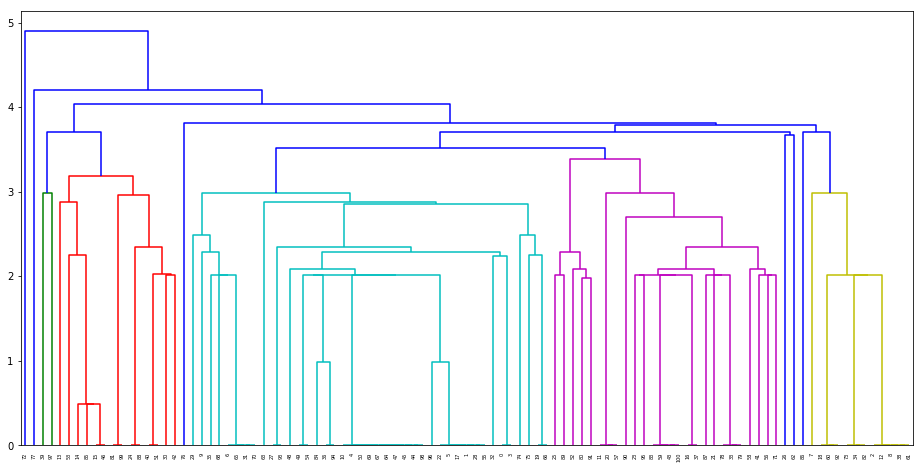

In [5]:
# generate clusters
hclust_2 = linkage(zoo_data)

# plot dendrogram
# increases figure size
plt.figure(figsize=(16, 8))
dendrogram(hclust_2)
plt.show()

We might expect to see 7 clusters, given that the actual data grouped animals into 7 categories. Looking at the dendrogram, this matches fairly well, but it's a bit hard to tell how successful hierarchical clustering is here.

### <span style="color:indigo;"> Example 2: Iris Species </span>

A clearer example might be the <a href="https://www.kaggle.com/uciml/iris">iris dataset</a>. Here, again, to make this an unsupervised learning problem, we'll remove the "Species" column and form clusters.

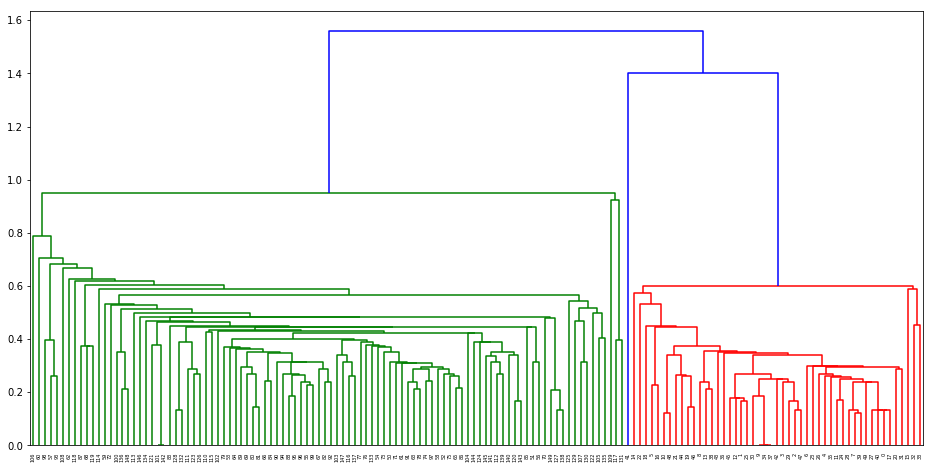

In [6]:
# import necessary packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

iris = pd.read_csv('Iris.csv')

# remove species column
iris = iris.drop('Species', axis=1)
iris = iris.drop('Id', axis=1)

# scale features using StandardScaler
iris = StandardScaler().fit_transform(iris)

# generate clusters
hclust = linkage(iris)

# plot dendrogram
# increases figure size
plt.figure(figsize=(16, 8))
dendrogram(hclust)
plt.show()

We see about 3 clusters, which is reasonable given that there were 3 species in the original data. 

## <span style="color:purple;"> K-Means Clustering </span>
K-means algorithm is a popular clustering algorithm since it is relatively simple and fast, as opposed to other clustering algorithms. The algorithm is defined as the following:

1. Decide input parameter k (number of clusters)  
2. Pick k random data points to use as centroids  
3. Compute distances for all data points to each k centroids, and assign each data point to a cluster containing the closest centroid  
4. Once all data points have been classified, compute the midpoint of all points for each cluster and assign as new centroid 
5. Repeat steps 3 and 4 until the centroids converge upon certain k points.

Since we only need to calculate k x n distances (rather than n(n-1) distances for knn algorithm), this algorithm is quite scalable and thus be done with relatively less computational resource. 

Let's use k-means clustering, with k=3 on the same <a href="https://www.kaggle.com/uciml/iris">iris dataset</a> we used previously. Again we'll be predicting species as an unsupervised learning problem, but we will use only petal length and width as predictors in order to stick to two dimensions when graphing.

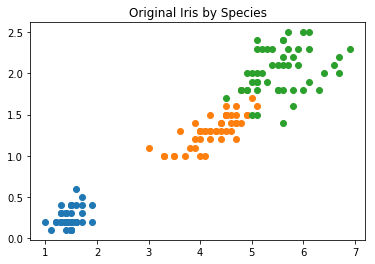

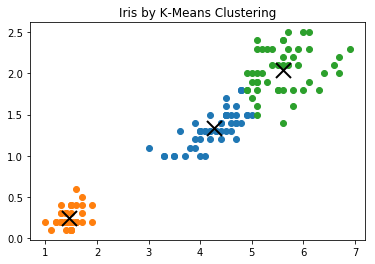

In [7]:
import pandas as pd
import numpy as np
iris = pd.read_csv('Iris.csv')
del iris['Id']
del iris['SepalLengthCm']
del iris['SepalWidthCm']

from matplotlib import pyplot as plt
# k is the input parameter set to the number of species
k = len(iris['Species'].unique())
for i in iris['Species'].unique():
    # select only the applicable rows
    ds = iris[iris['Species'] == i]
    # plot the points
    plt.plot(ds[['PetalLengthCm']],ds[['PetalWidthCm']],'o')
plt.title("Original Iris by Species")
plt.show()

from sklearn import cluster
del iris['Species']
kmeans = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300, algorithm='auto')
kmeans.fit(iris)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(k):
    # select only data observations from the applicable cluster
    ds = iris.iloc[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds['PetalLengthCm'],ds['PetalWidthCm'],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.title("Iris by K-Means Clustering")
plt.show()

It seems that the model is performing quite well as the two graphs are very similar. Note the position of the Xs in the second graph and how the points are clustered around them. K-means clustering can be a powerful, scalable tool. One downside is k-means struggles in regions with intermingled data. Examine the border between the two upper right clusters. This is the area with the most errors. Additionally, the k parameter must be first explored to ensure there are no preconceived notions. 

Now let's break down the k-means python function we used: 

        cluster.KMeans(n_clusters=k, n_init=10, max_iter=300, algorithm='auto')
The `n_clusters` parameter refers to the number of clusters and should always be set. The final parameter `algorithm` refers to the k-means algorithm used. 'Auto' chooses between the 'elkan' algorithm for dense data and the 'full' algorithm for sparse data. The `n_init` parameter is the number of times the algorithm will run with different randomly chosen initial centroid seeds. The `max_iter` parameter is the maximum number of iterations adjusting the centroid in a single run. For both `n_init` and `max_iter` the larger the number, the more accurate, but it will take more time and space. Since the centroid seeds are chosen randomly, more iterations ensure the true centroids are found and the result is not skewed by poorly chosen initial centroids. For more information, see the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">documentation</a>.

## <span style="color:purple;"> Principal Component Analysis (PCA) </span>

Suppose you're given a data set with many variables and asked to find the general "trends" in the data set. You might want a compressed approximation of the data set with fewer variables, or you may want to discover latent variables you hadn't considered. What might you do?

It turns out that there's an elegant way to extract trends from a large and complicated dataset called <b>principal component analysis</b> (PCA). PCA is used in industry quite frequently - an example of this is the million-dollar Netflix prize, in which the key insight of the winning team was to decompose the data set into a compact approximation for further manipulation.

Here is the method:

* Find the direction (i.e. linear combination, or weighted sum, of variables) along which the data has the most variance. This is the direction along which the projections of the data points are the largest. This is called the <b>first principal component</b>.
* Find the direction that's orthogonal to the first principal component and has the largest variance (projections of the data points are the largest). This is called the <b>second principal component</b>.
* Again, find the direction of largest variance that's orthogonal to the first two principal components.
* Continue the process until you have $k$ principal components.

![image](https://www.analyticsvidhya.com/wp-content/uploads/2016/03/2-1-e1458494877196.png)

As a general rule, $n$ dimensional data can have up to $n$ principal components. We often call the set of $k$ principal components where $k < n$ a <b>low-rank approximation</b> to the larger dataset. These are useful for understanding and operating on large or sparse datasets; they essentially allow us to identify important features and remove peripheral ones, thereby making large datasets easier to work with.

### <span style="color:indigio;"> Example: Human Resources Analytics </span>

We'll perform PCA on <a href="https://www.kaggle.com/ludobenistant/hr-analytics">this dataset</a>.

In [8]:
# import necessary packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

hr_data = pd.read_csv('HR_comma_sep.csv')

# remove irrelevant feature
hr_data = hr_data.drop('left', axis=1)

# convert non-numerical to categorical integer values
enc = LabelEncoder()
hr_data['sales'] = enc.fit_transform(hr_data['sales'])
hr_data['salary'] = enc.fit_transform(hr_data['salary'])

# scale features using StandardScaler
hr_data = StandardScaler().fit_transform(hr_data)

We can now perform PCA with `sklearn.decomposition.PCA`. We can specify the number of components we would like to consider using n_components. For more information, see the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">documentation</a>.

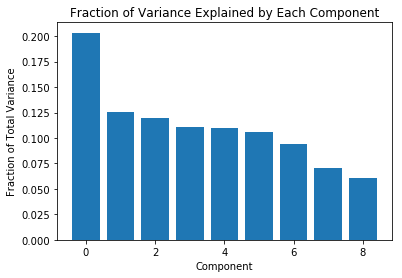

In [9]:
# perform PCA
pca = PCA().fit(hr_data)

# plot fraction of variance explained by each component
pca.explained_variance_ratio_
x = np.arange(9)
plt.bar(x, pca.explained_variance_ratio_)
plt.title('Fraction of Variance Explained by Each Component')
plt.xlabel('Component')
plt.ylabel('Fraction of Total Variance')
plt.show()

## <span style="color:purple;"> Sources </span>
http://fromdatawithlove.thegovans.us/2013/05/clustering-using-scikit-learn.html